In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
import warnings
warnings.filterwarnings('ignore')

#### EDA

In [2]:
data = pd.read_csv('glass.csv')
data.head()

Id number       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  \
0          1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   
1          2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   
2          3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   
3          4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   
4          5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   

   Type of glass  
0              1  
1              1  
2              1  
3              1  
4              1

In [3]:
data.describe()

Id number          RI          Na          Mg          Al          Si  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean   107.500000    1.518365   13.407850    2.684533    1.444907   72.650935   
std     61.920648    0.003037    0.816604    1.442408    0.499270    0.774546   
min      1.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     54.250000    1.516522   12.907500    2.115000    1.190000   72.280000   
50%    107.500000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    160.750000    1.519157   13.825000    3.600000    1.630000   73.087500   
max    214.000000    1.533930   17.380000    4.490000    3.500000   75.410000   

                K          Ca          Ba          Fe  Type of glass  
count  214.000000  214.000000  214.000000  214.000000     214.000000  
mean     0.497056    8.956963    0.175047    0.057009       2.780374  
std      0.652192    1.423153    0.497219    0.097439       2.103739  
min      0.000000    5.430000    0.000000    0.000000       1.000000  
25%      0.122500    8.240000    0.000000    0.000000       1.000000  
50%      0.555000    8.600000    0.000000    0.000000       2.000000  
75%      0.610000    9.172500    0.000000    0.100000       3.000000  
max      6.210000   16.190000    3.150000    0.510000       7.000000

In [4]:
# checking for duplicates 
data.duplicated().sum()

0

In [5]:
# checking for null values 
data.isna().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

<Axes: >

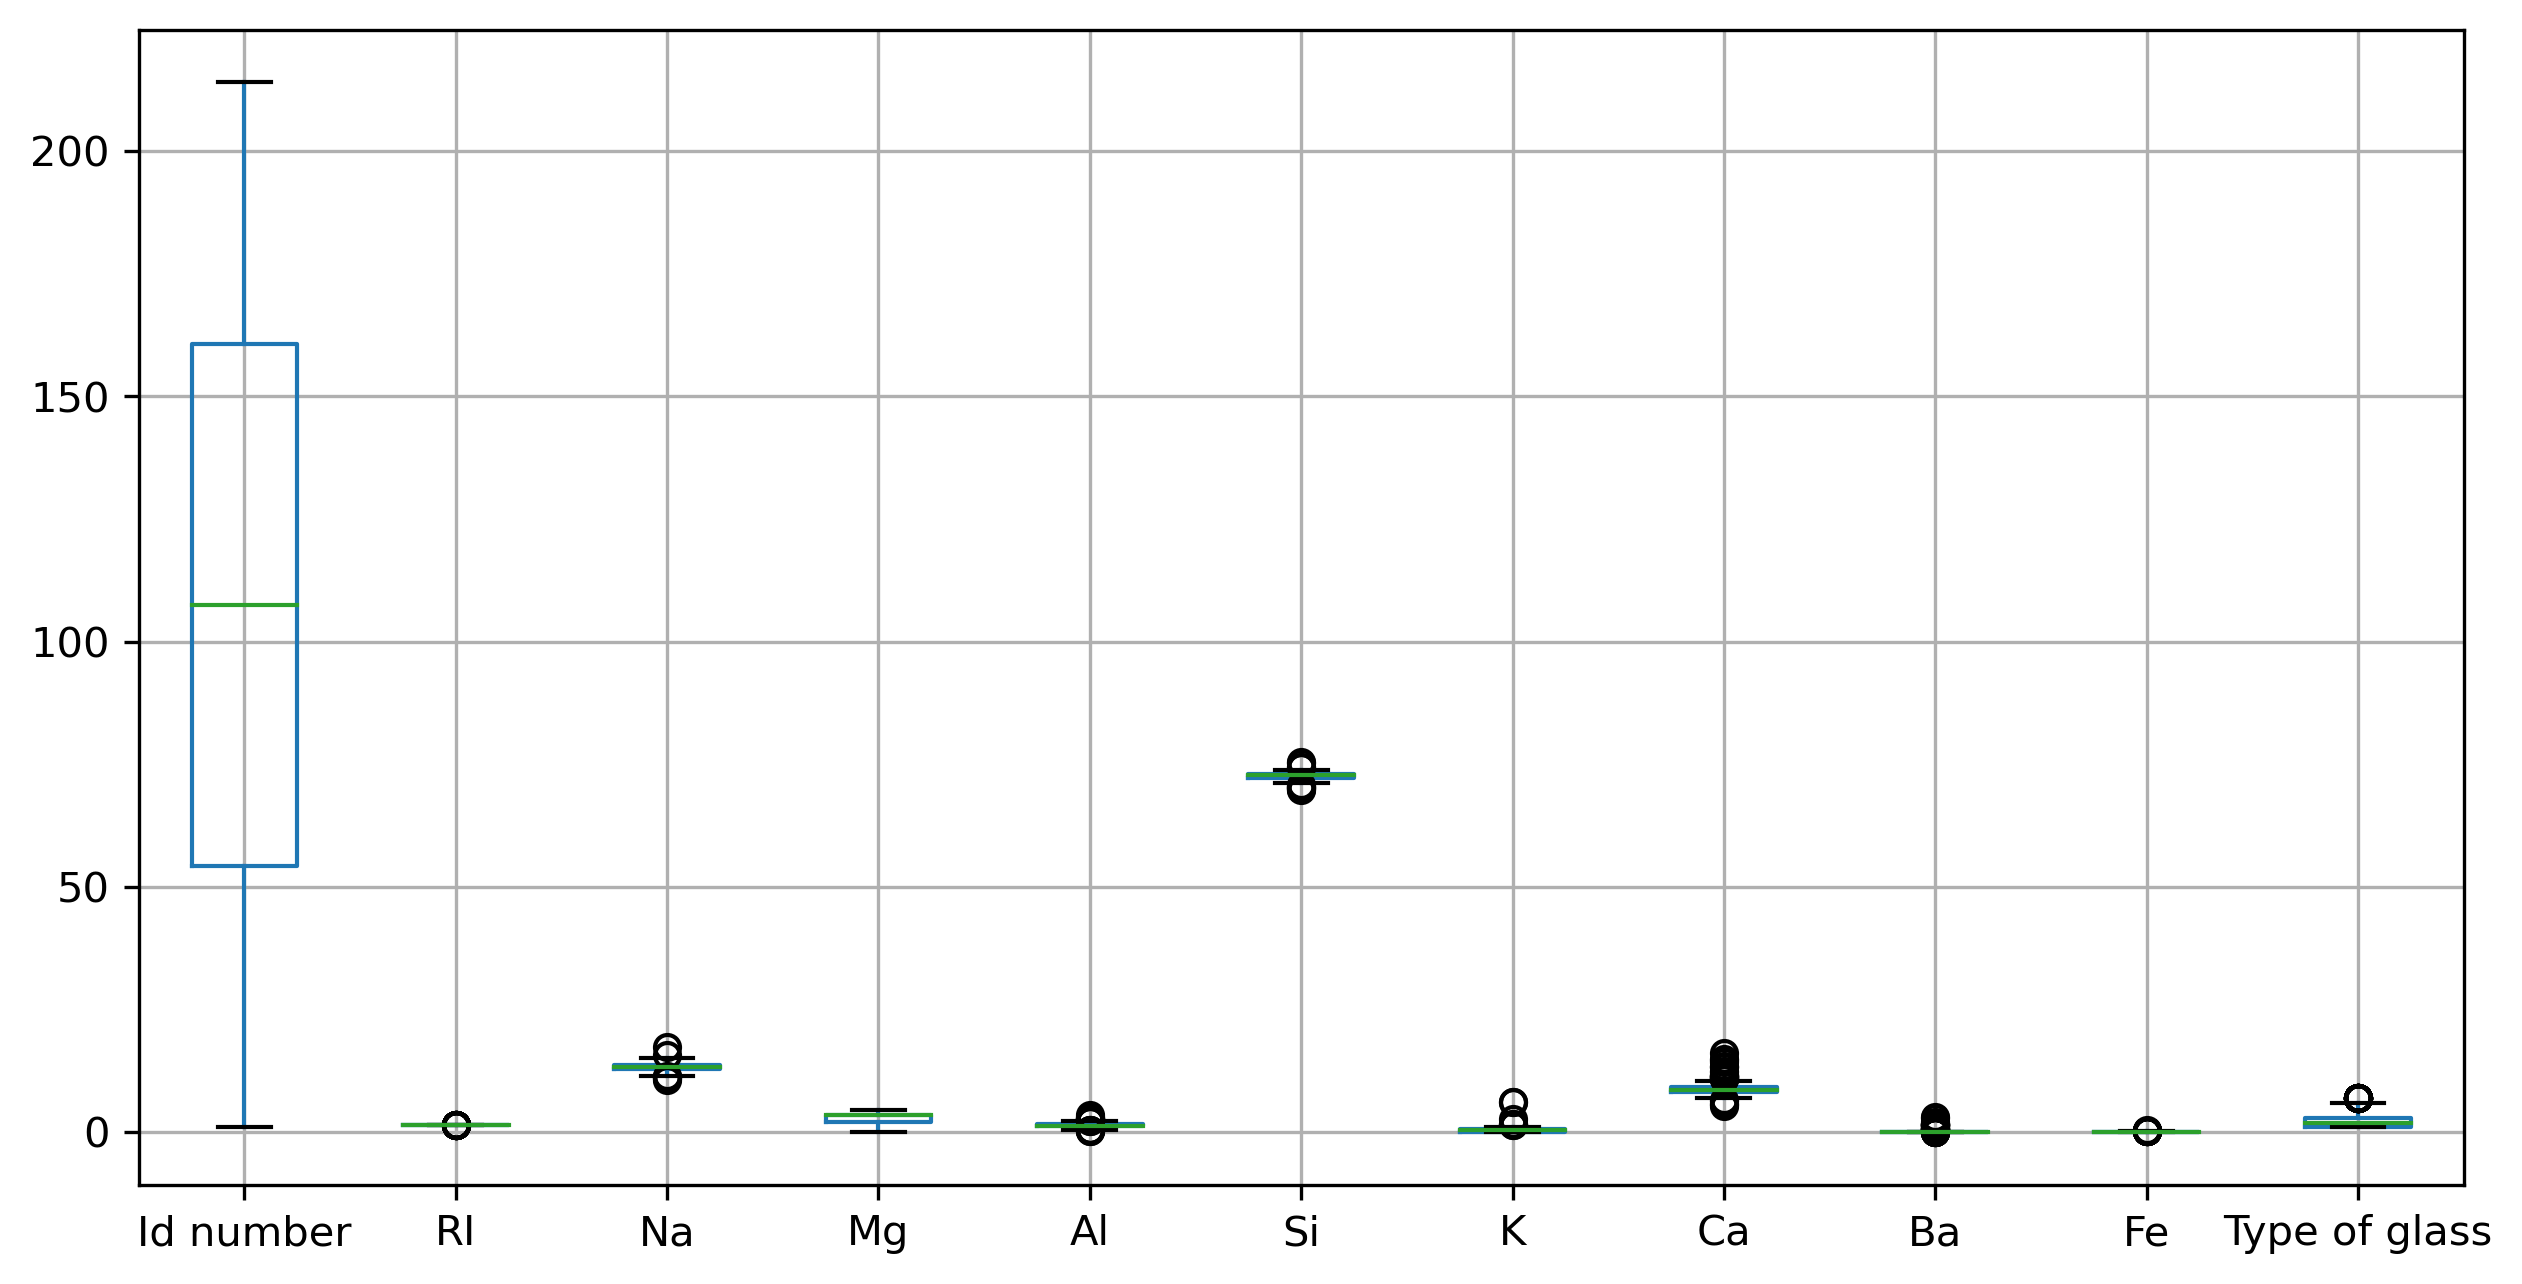

In [6]:
# checking for outliers 
data.boxplot()

In [7]:
# detecting and treating outliers 
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3 - q1
    
    upper_extreme = q3 + (1.5 * iqr)
    lower_extreme = q1 - (1.5 * iqr)
    
    return lower_extreme, upper_extreme 

In [8]:
def outlier_treatment(data,colname):
    lower_extreme,upper_extreme = outlier_detection(data,colname)
    data.loc[data[colname]>upper_extreme,colname] = upper_extreme
    data.loc[data[colname]<lower_extreme,colname] = lower_extreme
    
    print(f"All the outliers of column {colname} are treated !!!")

In [9]:
outlier_treatment(data,'RI') # 'Na','Mg','AI','K','Ca','Ba','Fe','Type of glass'
outlier_treatment(data,'Na')
outlier_treatment(data,'Mg')
outlier_treatment(data,'Al')
outlier_treatment(data,'Si')
outlier_treatment(data,'K')
outlier_treatment(data,'Ca')
outlier_treatment(data,'Ba')
outlier_treatment(data,'Fe')


All the outliers of column RI are treated !!!
All the outliers of column Na are treated !!!
All the outliers of column Mg are treated !!!
All the outliers of column Al are treated !!!
All the outliers of column Si are treated !!!
All the outliers of column K are treated !!!
All the outliers of column Ca are treated !!!
All the outliers of column Ba are treated !!!
All the outliers of column Fe are treated !!!


<Axes: >

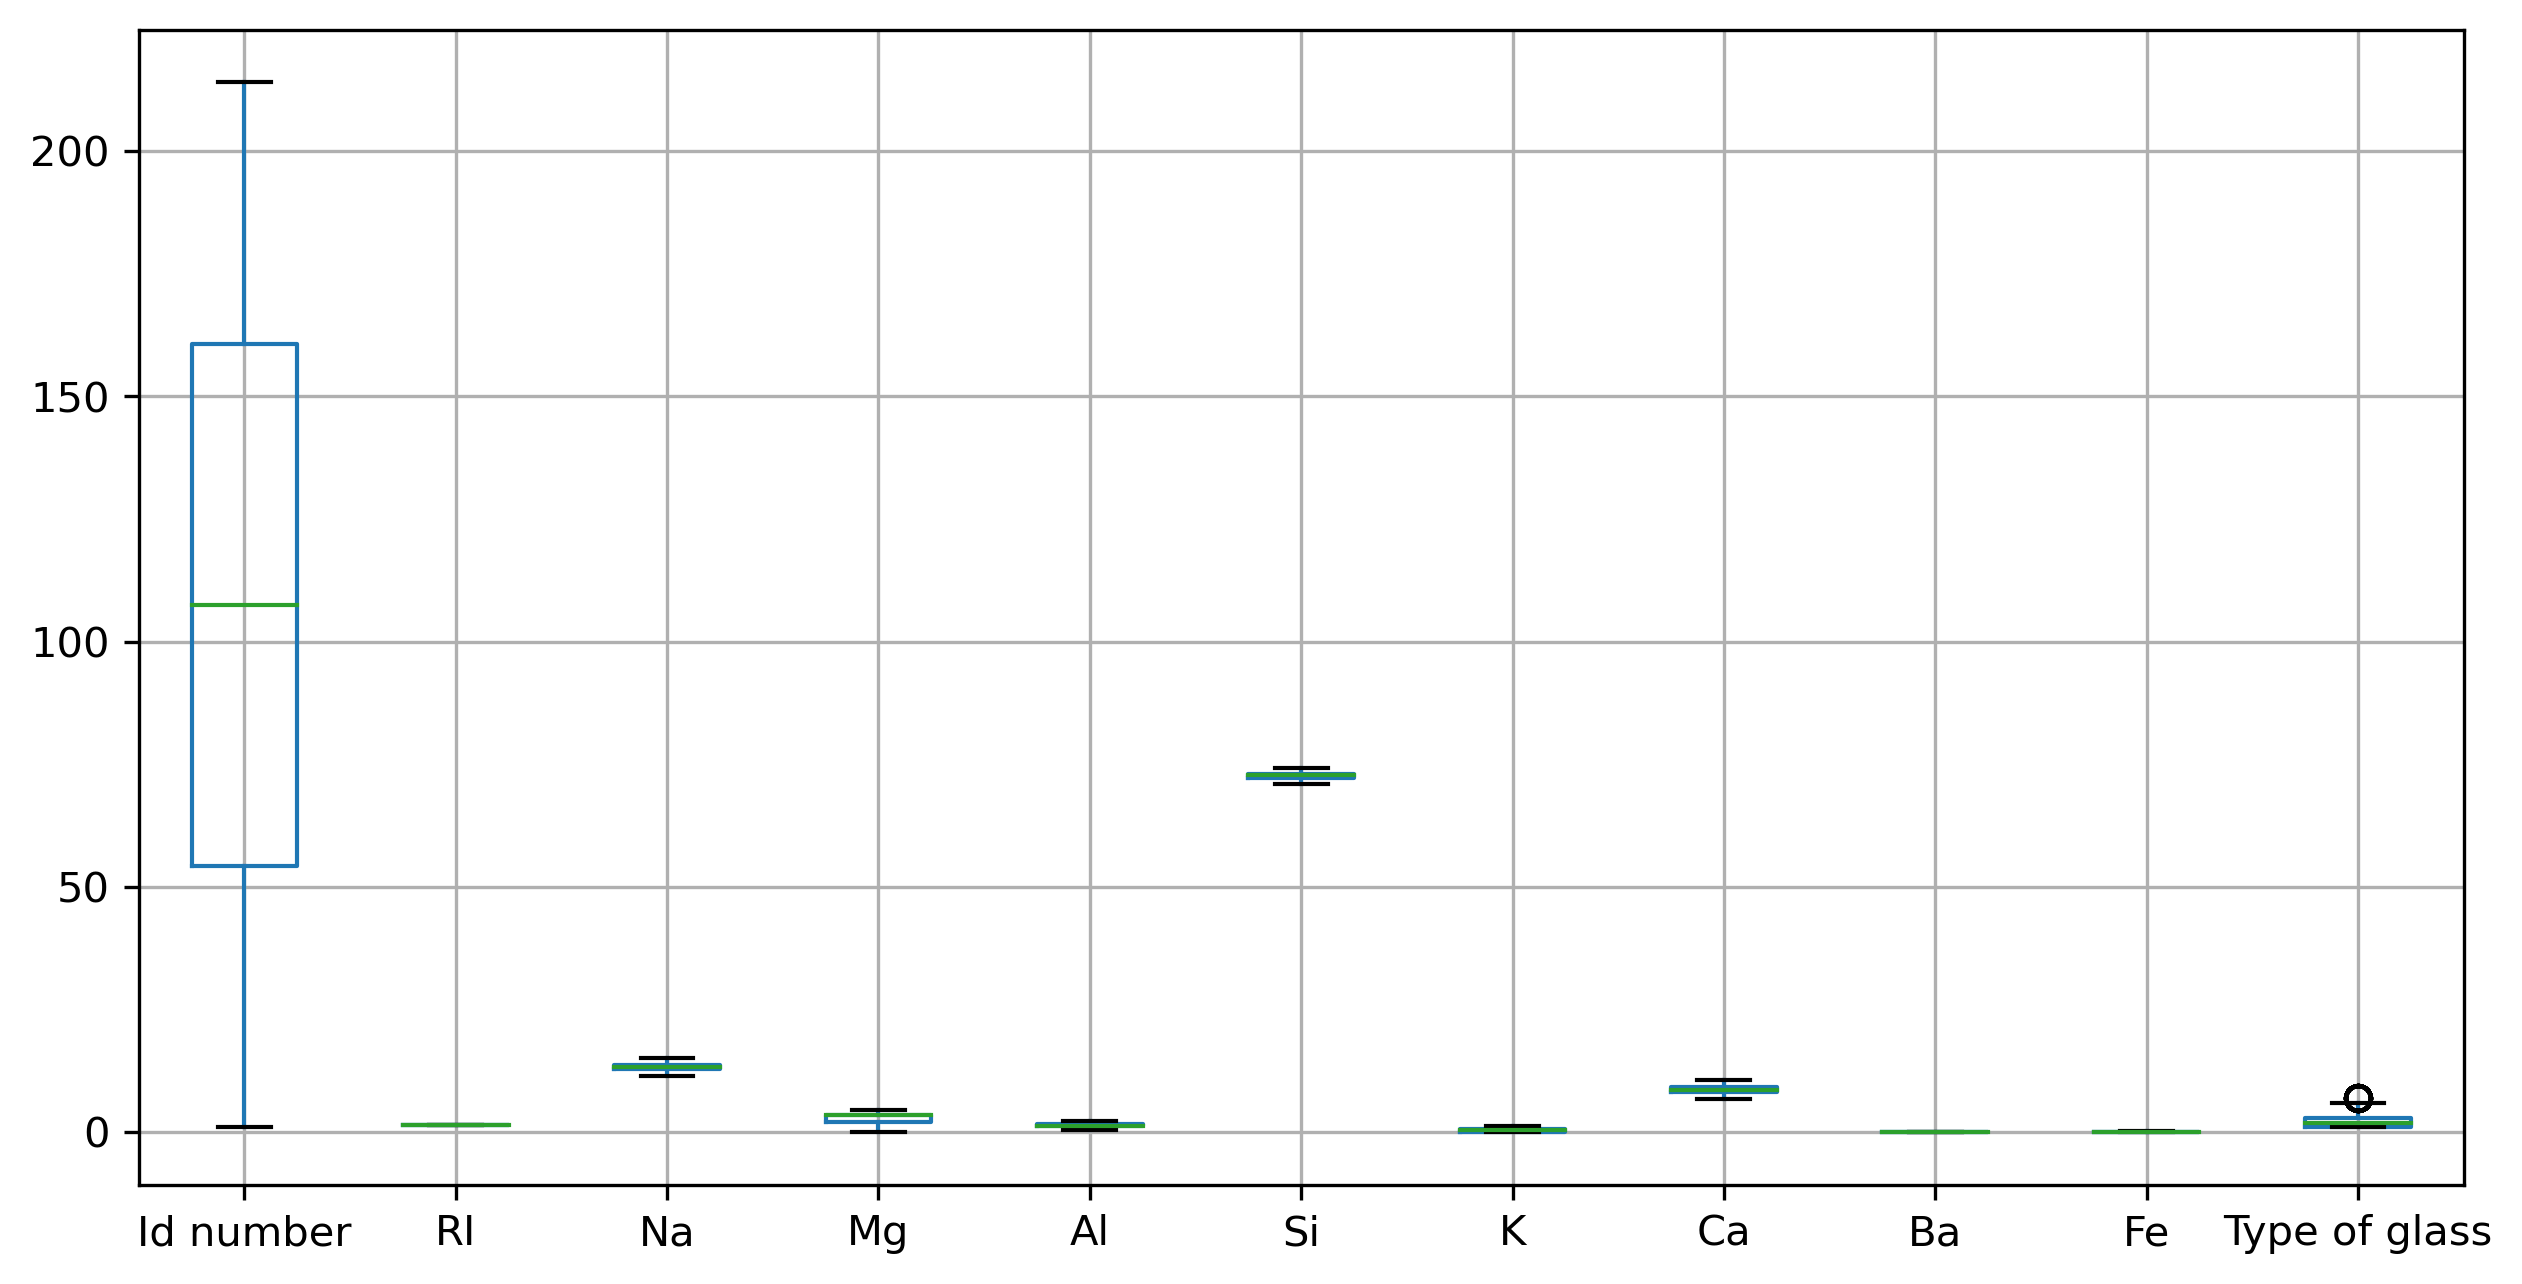

In [10]:
data.boxplot()

In [11]:
data.describe()

Id number          RI          Na          Mg          Al          Si  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean   107.500000    1.518165   13.405181    2.684533    1.420794   72.668949   
std     61.920648    0.002374    0.742792    1.442408    0.424339    0.658469   
min      1.000000    1.512570   11.531250    0.000000    0.530000   71.068750   
25%     54.250000    1.516522   12.907500    2.115000    1.190000   72.280000   
50%    107.500000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    160.750000    1.519157   13.825000    3.600000    1.630000   73.087500   
max    214.000000    1.523110   15.201250    4.490000    2.290000   74.298750   

                K          Ca     Ba          Fe  Type of glass  
count  214.000000  214.000000  214.0  214.000000     214.000000  
mean     0.440789    8.796741    0.0    0.052850       2.780374  
std      0.306640    0.873799    0.0    0.085568       2.103739  
min      0.000000    6.841250    0.0    0.000000       1.000000  
25%      0.122500    8.240000    0.0    0.000000       1.000000  
50%      0.555000    8.600000    0.0    0.000000       2.000000  
75%      0.610000    9.172500    0.0    0.100000       3.000000  
max      1.341250   10.571250    0.0    0.250000       7.000000

#### Data Visualization

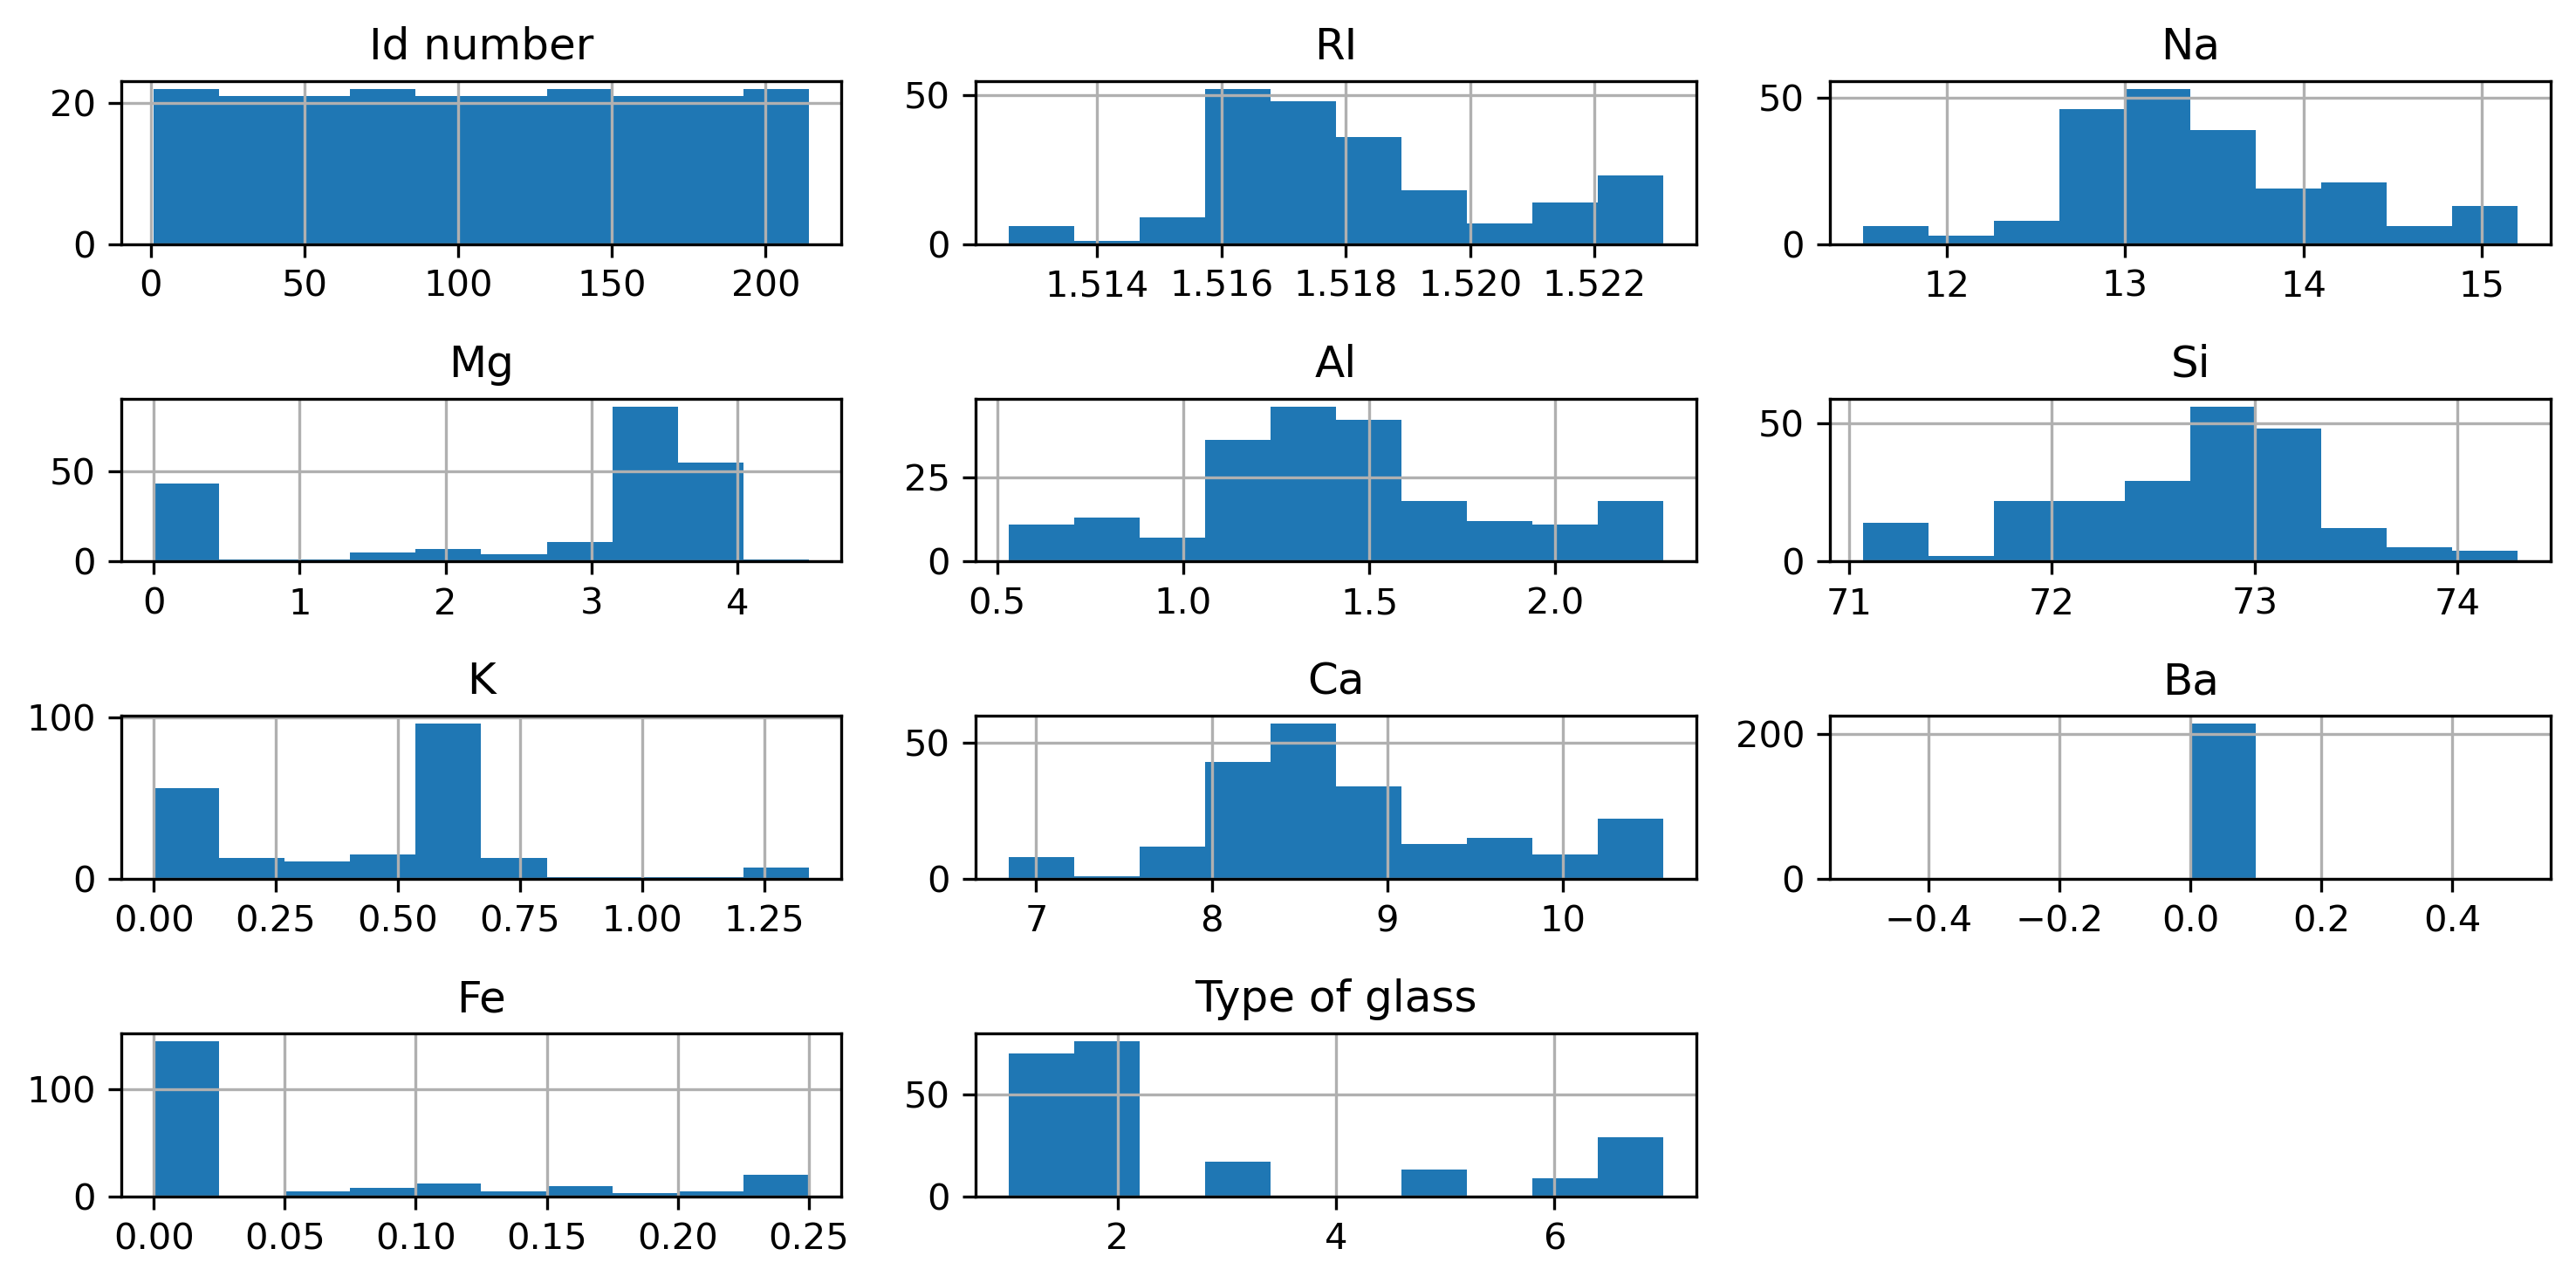

In [16]:
data.hist()
plt.tight_layout()

In [17]:
# after removing outliers from column 'Ba', it is not showing any significant info, like mostly it has only 0 values.
data['Ba'].value_counts()

Ba
0.0    214
Name: count, dtype: int64

In [18]:
# we will drop this column 
data = data.drop('Ba',axis=1)

In [19]:
data

Id number       RI     Na    Mg    Al     Si     K    Ca   Fe  \
0            1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0   
1            2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0   
2            3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0   
3            4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0   
4            5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0   
..         ...      ...    ...   ...   ...    ...   ...   ...  ...   
209        210  1.51623  14.14  0.00  2.29  72.61  0.08  9.18  0.0   
210        211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  0.0   
211        212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  0.0   
212        213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  0.0   
213        214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  0.0   

     Type of glass  
0                1  
1                1  
2                1  
3                1  
4                1  
..             ...  
209              7  
210              7  
211              7  
212              7  
213              7  

[214 rows x 10 columns]

In [23]:
import seaborn as sns
sns.pairplot(data)

#### Random Forest Model Implementation

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [45]:
x = data.drop('Type of glass',axis=1)
y = data['Type of glass']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [48]:
scaler = StandardScaler()

In [49]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [50]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [51]:
y_pred = rf.predict(x_test_scaled)

In [52]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



#### Bagging and Boosting Methods

In [54]:
# Bagging
bagging = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=50, random_state=42)
bagging.fit(x_train_scaled, y_train)
y_pred_bagging = bagging.predict(x_test_scaled)

In [55]:
# Boosting
boosting = AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=50, random_state=42)
boosting.fit(x_train_scaled, y_train)
y_pred_boosting = boosting.predict(x_test_scaled)

In [56]:
# Evaluating Bagging performance
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

In [57]:
# Evaluating Boosting performance
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
precision_boosting = precision_score(y_test, y_pred_boosting, average='weighted')
recall_boosting = recall_score(y_test, y_pred_boosting, average='weighted')
f1_boosting = f1_score(y_test, y_pred_boosting, average='weighted')

In [58]:
# comparison
print(f"Bagging - Accuracy: {accuracy_bagging:.2f}, Precision: {precision_bagging:.2f}, Recall: {recall_bagging:.2f}, F1 Score: {f1_bagging:.2f}")
print(f"Boosting - Accuracy: {accuracy_boosting:.2f}, Precision: {precision_boosting:.2f}, Recall: {recall_boosting:.2f}, F1 Score: {f1_boosting:.2f}")

Bagging - Accuracy: 0.98, Precision: 0.98, Recall: 0.98, F1 Score: 0.98
Boosting - Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1 Score: 1.00


##### Additional Notes

In [ ]:
'''
1. Explain Bagging and Boosting methods. How is it different from each other.
-> Bagging: Combines multiple models trained independently on random data subsets to reduce variance and prevent overfitting.
   Boosting: Sequentially trains models that focus on correcting previous errors, improving accuracy by reducing bias.
   Key Differences: Bagging emphasizes parallel training for variance reduction, while boosting emphasizes sequential training 
   to reduce bias.

2. Explain how to handle imbalance in the data.
-> Resampling: Using oversampling (e.g., SMOTE) for the minority class or undersampling for the majority class.
   Class Weighting: Adjusting class weights to give more importance to the minority class in model training.
   Ensemble Methods: Using techniques like Balanced Random Forest to improve minority class detection.
'''